## 4. Building a Predictive Model

In [48]:
# Importing the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest




import pickle


In [49]:
df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week8\ML-deployment-Project\data\cleaneddata.csv")
df.shape

(614, 16)

In [50]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,LoanAmount_Log,TotalIncome,TotalIncome_Log,Married_new,Gender_new,Self_Employed_new,Education_new,Loan_Status_new,Property_Area_new
0,0,5849,0,128,360,1,8.674026,4.852030,5849.0,8.674026,0,1,0,0,1,2
1,1,4583,1508,128,360,1,8.430109,4.852030,6091.0,8.714568,1,1,0,0,0,0
2,0,3000,0,66,360,1,8.006368,4.189655,3000.0,8.006368,1,1,1,0,1,2
3,0,2583,2358,120,360,1,7.856707,4.787492,4941.0,8.505323,1,1,0,1,1,2
4,0,6000,0,141,360,1,8.699515,4.948760,6000.0,8.699515,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71,360,1,7.972466,4.262680,2900.0,7.972466,0,0,0,0,1,0
610,3,4106,0,40,180,1,8.320205,3.688879,4106.0,8.320205,1,1,0,0,1,0
611,1,8072,240,253,360,1,8.996157,5.533389,8312.0,9.025456,1,1,0,0,1,2
612,2,7583,0,187,360,1,8.933664,5.231109,7583.0,8.933664,1,1,0,0,1,2


In [51]:
df.drop(['ApplicantIncome', 'LoanAmount', 'TotalIncome'], axis=1, inplace=True)

In [52]:
df

,Dependents,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,LoanAmount_Log,TotalIncome_Log,Married_new,Gender_new,Self_Employed_new,Education_new,Loan_Status_new,Property_Area_new
0,0,0,360,1,8.674026,4.852030,8.674026,0,1,0,0,1,2
1,1,1508,360,1,8.430109,4.852030,8.714568,1,1,0,0,0,0
2,0,0,360,1,8.006368,4.189655,8.006368,1,1,1,0,1,2
3,0,2358,360,1,7.856707,4.787492,8.505323,1,1,0,1,1,2
4,0,0,360,1,8.699515,4.948760,8.699515,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,360,1,7.972466,4.262680,7.972466,0,0,0,0,1,0
610,3,0,180,1,8.320205,3.688879,8.320205,1,1,0,0,1,0
611,1,240,360,1,8.996157,5.533389,9.025456,1,1,0,0,1,2
612,2,0,360,1,8.933664,5.231109,8.933664,1,1,0,0,1,2


# Assign X (IV) and Y (DV) and Split to test & Train Datasets

In [53]:
# Separating the dataframe between the X (independent) and y (dependent) variables
X = df.drop('Loan_Status_new', axis=1).select_dtypes(include=[np.number])
y = df['Loan_Status_new']

In [54]:
# Splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [55]:
# Printing df to check
print(df.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(614, 13)
(460, 12)
(154, 12)
(460,)
(154,)


#   Scaling X

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.75592181,  1.95904526,  0.28549947, ..., -0.40928314,
        -0.53377542, -0.04733724],
       [-0.75592181,  0.39782991,  0.28549947, ..., -0.40928314,
         1.87344707,  1.23355266],
       [ 1.24249217, -0.2153692 ,  0.28549947, ..., -0.40928314,
         1.87344707,  1.23355266],
       ...,
       [-0.75592181, -0.70858426,  0.28549947, ..., -0.40928314,
        -0.53377542, -0.04733724],
       [ 2.24169917,  0.31863095,  0.28549947, ...,  2.44329633,
         1.87344707, -0.04733724],
       [ 1.24249217,  0.11755096,  0.28549947, ..., -0.40928314,
         1.87344707, -0.04733724]])

# PCA for Feature Selection

In [57]:
# Performing PCA

pca = PCA()
pca.fit(X_train_scaled)
#X_train_pca =pca.transform(X_train_scaled)

PCA()

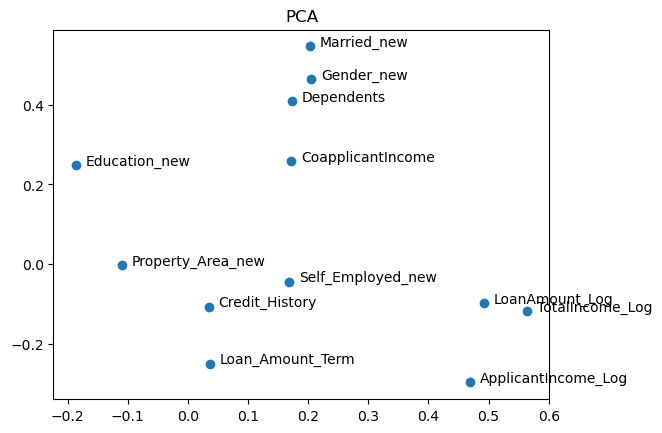

In [58]:
#creating a pca object with n componenets
pca = PCA(n_components=8)

#fitting and transforming data using PCA
pca.fit(X_train_scaled)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(X.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(7,0), textcoords='offset points')

In [59]:
print(sum(pca.explained_variance_ratio_ *100))

85.50771460728859


In [60]:
pca.explained_variance_ratio_ *100

array([21.94435716, 13.58041444, 10.24291826,  9.0308987 ,  8.26834998,
        8.22247509,  7.50589044,  6.71241053])

Text(0.5, 1.0, 'Explained Variance of PCA features')

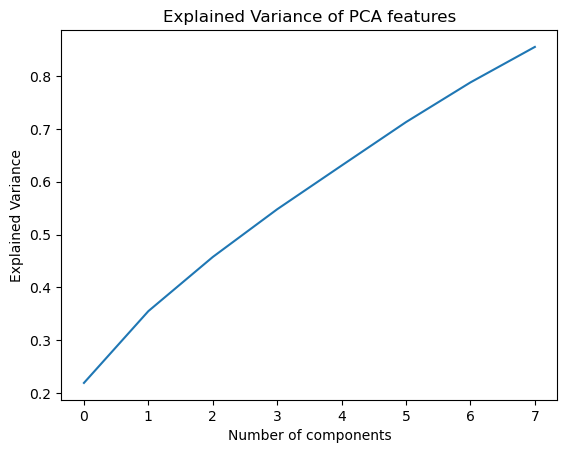

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCA features')

# Elbow Curve for feature selection

In [62]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

c:\Users\zarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [63]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1517.909848637011
2 : 1444.1674723143424
3 : 1020.0041920165924
4 : 610.5686458308776
5 : 430.9040010926704
6 : 320.7559525774085
7 : 254.81974084751974
8 : 241.69139678627099
9 : 191.93081015928217


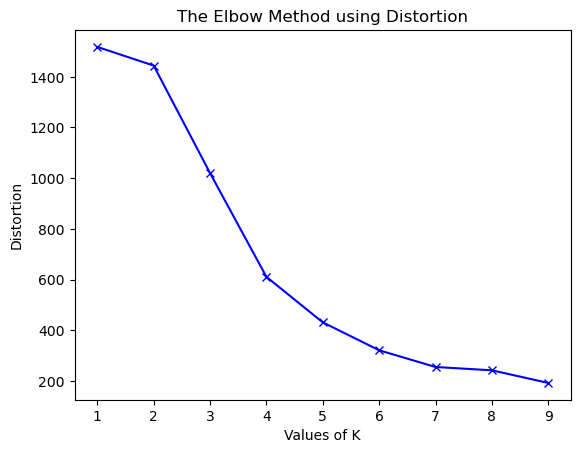

In [64]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Modelling


In [65]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss


## Logistic Regression

In [66]:
logModel = LogisticRegression(max_iter=1000, random_state=100)
logModel.fit(X_train, y_train)
y_pred_logModel=logModel.predict(X_test)
y_pred_logModel

# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_logModel))
print("Precision: ", precision_score(y_test, y_pred_logModel))
print("Recall: ", recall_score(y_test, y_pred_logModel))
print("F1-score: ", f1_score(y_test, y_pred_logModel))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_logModel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logModel))

Accuracy:  0.7402597402597403
Precision:  0.7109375
Recall:  0.9680851063829787
F1-score:  0.8198198198198199
ROC-AUC score:  0.675709219858156
Confusion Matrix:
 [[23 37]
 [ 3 91]]


## Random Forest Classifier

In [67]:
rfcModel = RandomForestClassifier(n_estimators=1000, random_state=100)
rfcModel.fit(X_train, y_train)
y_pred_rfc=logModel.predict(X_test)
y_pred_rfc


# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))
print("Precision: ", precision_score(y_test, y_pred_rfc))
print("Recall: ", recall_score(y_test, y_pred_rfc))
print("F1-score: ", f1_score(y_test, y_pred_rfc))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))

Accuracy:  0.7402597402597403
Precision:  0.7109375
Recall:  0.9680851063829787
F1-score:  0.8198198198198199
ROC-AUC score:  0.675709219858156
Confusion Matrix:
 [[23 37]
 [ 3 91]]


## Decision Tree Model

In [68]:
dtcModel = DecisionTreeClassifier()
dtcModel.fit(X_train,y_train)
y_pred_dtcModel=dtcModel.predict(X_test)
y_pred_dtcModel

# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_dtcModel))
print("Precision: ", precision_score(y_test, y_pred_dtcModel))
print("Recall: ", recall_score(y_test, y_pred_dtcModel))
print("F1-score: ", f1_score(y_test, y_pred_dtcModel))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_dtcModel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtcModel))


Accuracy:  0.7077922077922078
Precision:  0.7333333333333333
Recall:  0.8191489361702128
F1-score:  0.7738693467336683
ROC-AUC score:  0.676241134751773
Confusion Matrix:
 [[32 28]
 [17 77]]


## KNClassifier

In [69]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, y_train)
y_pred_knnModel=knnModel.predict(X_test)
y_pred_knnModel

# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_knnModel))
print("Precision: ", precision_score(y_test, y_pred_knnModel))
print("Recall: ", recall_score(y_test, y_pred_knnModel))
print("F1-score: ", f1_score(y_test, y_pred_knnModel))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_knnModel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knnModel))

Accuracy:  0.6363636363636364
Precision:  0.6439393939393939
Recall:  0.9042553191489362
F1-score:  0.7522123893805309
ROC-AUC score:  0.5604609929078015
Confusion Matrix:
 [[13 47]
 [ 9 85]]


c:\Users\zarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Try paramater grid search to improve the results

# Grid Search
- import libraries
- The estimator parameter of GridSearchCV requires the model we are using for the hyper parameter tuning process
- The param_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator
- pass the features and the dependent variable(X and y) to the model
- used the three hyper-parameters; C, epsilon and gamma

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
import math


## Method 1 - Logistic Regression (Grid Search)

In [71]:
# Trying the parameter grid search for the baseline_model_1 (Logistic Regression model)
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initializing the Logistic Regression model
#lr = LogisticRegression(max_iter=1000, random_state=100)

# Creating a GridSearchCV object and fitting it to the training data (Using the logModel previously created)
grid_search_1 = GridSearchCV(estimator=logModel, param_grid=param_grid_lr, cv=5)
grid_search_1.fit(X_train, y_train)

# Printting the best parameters and best score
print("Best parameters: ", grid_search_1.best_params_)
print("Best score: ", grid_search_1.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_logModel = grid_search_1.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_logModel = accuracy_score(y_test, y_pred_logModel)
precision_logModel = precision_score(y_test, y_pred_logModel)
recall_logModel = recall_score(y_test, y_pred_logModel)
f1_logModel = f1_score(y_test, y_pred_logModel)
print("Accuracy Logistic Model: ", accuracy_logModel)
print("Precision Logistic Model: ", precision_logModel)
print("Recall Logistic Model: ", recall_logModel)
print("F1-score Logistic Model: ", f1_logModel)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.832608695652174
Accuracy Logistic Model:  0.7402597402597403
Precision Logistic Model:  0.7109375
Recall Logistic Model:  0.9680851063829787
F1-score Logistic Model:  0.8198198198198199


In [87]:
import pickle

pickle.dump(grid_search_1, open('ModelGS.pkl', 'wb'))

In [88]:
load_model = pickle.load(open('ModelGS.pkl', 'rb'))

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [89]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import pickle

In [90]:
# Our own class to be inserted into the pipeline
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Features from X we want to keep for our PCA
feats = ['Dependents','CoapplicantIncome','Loan_Amount_Term',
        'Credit_History','ApplicantIncome_Log','LoanAmount_Log',
        'TotalIncome_Log','Married_new','Gender_new',
        'Self_Employed_new','Education_new','Property_Area_new']
# Creating a class object with indexes we want to keep
raw_feats = RawFeats(feats)

In [91]:
# Logistic Regressor Model
lr = LogisticRegression()

In [92]:
# Combining everything into our pipeline
PCA_pipeline = Pipeline([
    ("rawFeats", raw_feats),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5))
])

kbest_pipeline = Pipeline([("kBest", SelectKBest(k=3))])

In [93]:
# Combining the outputs with FeatureUnion
all_features = FeatureUnion([
    ("pcaPipeline", PCA_pipeline), 
    ("kBestPipeline", kbest_pipeline)
])

In [94]:
# Creating the main pipeline
main_pipeline = Pipeline([
    ("features", all_features),
    ("lr", lr)
])

In [95]:
# Checking the estimator parameters first
estimator = LogisticRegression()
print(estimator.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [96]:
# Seeting the hyperparameter tunning with GridSearchCV
param_grid = {"features__pcaPipeline__pca__n_components": [1, 2, 3, 4, 5],
                  "features__kBestPipeline__kBest__k": [1, 2, 3],
                  "lr__max_iter":[100, 500, 1000],
                  "lr__C": [0.1, 1, 10, 100], 
                  "lr__penalty": ['l1', 'l2'],
                  "lr__solver": ['liblinear', 'saga']
             }

# Creating a Grid Search object
grid_search = GridSearchCV(main_pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)    

# Fitting the model and tune parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pcaPipeline',
                                                                        Pipeline(steps=[('rawFeats',
                                                                                         <__main__.RawFeats object at 0x0000023174B780D0>),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('pca',
                                                                                         PCA(n_components=5))])),
                                                                       ('kBestPipeline',
                                                                        Pipeline(steps=[('kBest',
                                                                                         SelectKBest(k=3))]))])),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'features__kBestPipeline__kBest__k': [1, 2, 3],
                         'features__pcaPipeline__pca__n_components': [1, 2, 3,
                                                                      4, 5],
                         'lr__C': [0.1, 1, 10, 100],
                         'lr__max_iter': [100, 500, 1000],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga']},
             verbose=10)

In [97]:
# Visualizing the pipeline
from sklearn import set_config
set_config(display='diagram')
main_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pcaPipeline',
                                                 Pipeline(steps=[('rawFeats',
                                                                  <__main__.RawFeats object at 0x0000023174B780D0>),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA(n_components=5))])),
                                                ('kBestPipeline',
                                                 Pipeline(steps=[('kBest',
                                                                  SelectKBest(k=3))]))])),
                ('lr', LogisticRegression())])

In [98]:
# Checking the best parameters
print(grid_search.best_params_)

{'features__kBestPipeline__kBest__k': 1, 'features__pcaPipeline__pca__n_components': 5, 'lr__C': 0.1, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}


In [99]:
# Testing the model tunned
X_test_row = X_test.loc[:, ]
y_pred = grid_search.predict(X_test_row)
print("Predicted outcome:", y_pred[0:10])

Predicted outcome: [1 1 1 1 1 1 1 1 1 1]


In [100]:
# Calculating the accuracy and score of the best estimator
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Score:", score)

Accuracy: 0.7402597402597403
Score: 0.6773517703750263


In [101]:
pickle.dump( grid_search, open( "PipelineModel.pkl", "wb" ) )


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python